2B Regression Analysis
. Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing 
the following:  
a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard 
Deviation, Skewness and Kurtosis 
b. Bivariate analysis: Linear and logistic regression modeling  
c. Multiple Regression analysis  
d. Also compare the results of the above analysis for the two data sets 

In [2]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - --------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import statsmodels.api as sm

In [2]:
diab=pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diab.shape

(768, 9)

In [4]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diab.isnull().values.any()

False

In [6]:
diab.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [7]:
diab.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [8]:
diab.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [9]:
diab.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [10]:
print("\nDetailed Descriptive Statistics:")
stats_diab = diab.describe().transpose()
stats_diab['variance'] = diab.var()
stats_diab['skewness'] = diab.skew()
stats_diab['kurtosis'] = diab.kurtosis()
print(stats_diab)


Detailed Descriptive Statistics:
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max      variance  skewness  \
Pregnancies                 3.0000    6.00000   17.00     11.354056  0.901674   
Glucose                   117.000

In [11]:
#Linear Regression
X_linear = sm.add_constant(diab['Glucose'])
y_linear = diab['Outcome']
model_linear = sm.OLS(y_linear, X_linear).fit()
print("\nLinear Regression Model Summary:")
print(model_linear.summary())


Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     213.2
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           8.94e-43
Time:                        22:54:30   Log-Likelihood:                -426.39
No. Observations:                 768   AIC:                             856.8
Df Residuals:                     766   BIC:                             866.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4

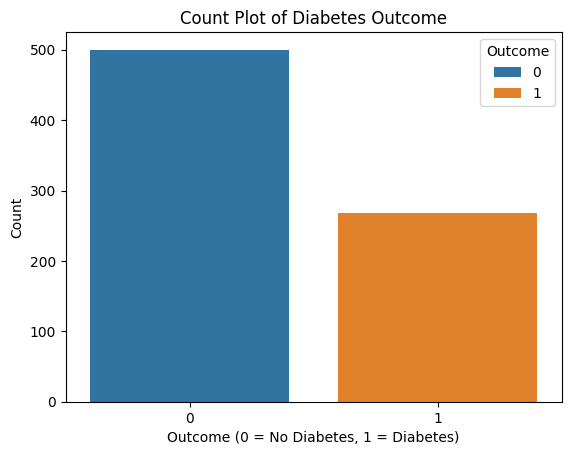

In [12]:
sns.countplot(x='Outcome',hue = 'Outcome',data=diab)
plt.title('Count Plot of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Count Plot of Glucose by Outcome')

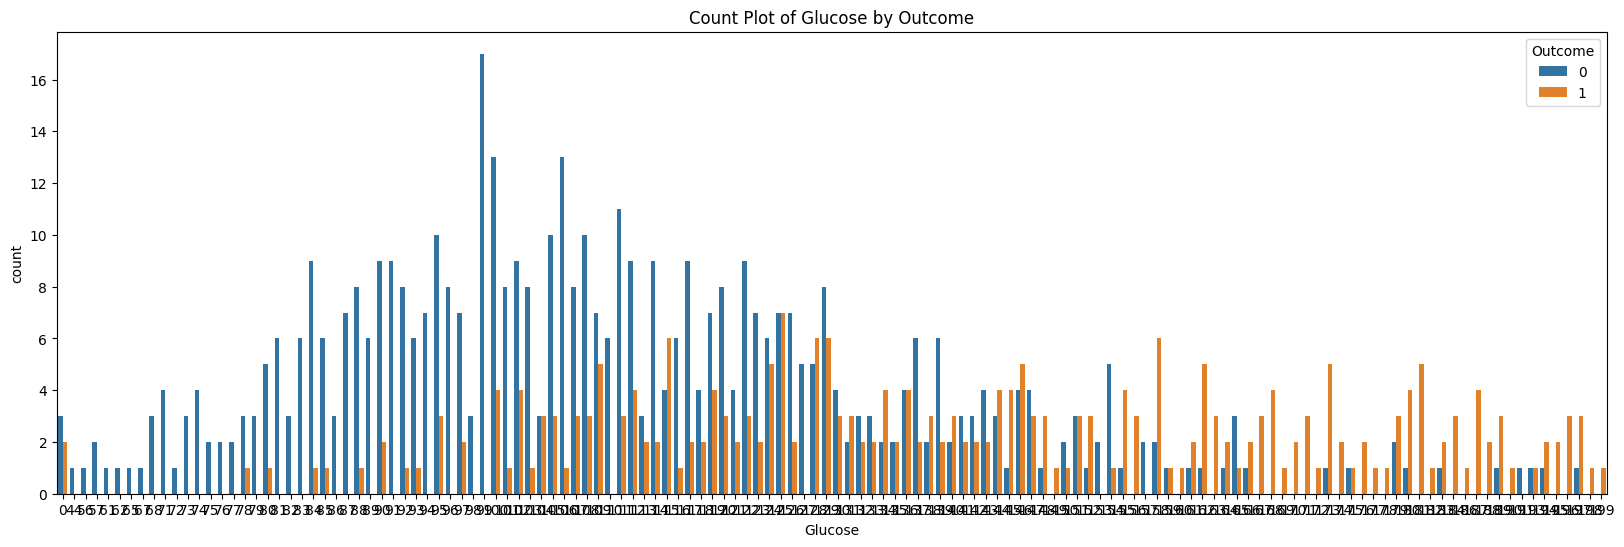

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(x=diab.Glucose ,hue = 'Outcome',data=diab)
plt.title("Count Plot for Outcome")
plt.title("Count Plot of Glucose by Outcome")

above graph may be extra part

In [14]:
#Logistic Regression
X_logistic = sm.add_constant(diab.drop(columns=['Outcome']))
y_logistic = diab['Outcome']
model_logistic = sm.Logit(y_logistic, X_logistic).fit()
print("\nLogistic Regression Model Summary:")
print(model_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.2718
Time:                        22:54:45   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.7

In [15]:
# Multiple Regression
X_multiple = sm.add_constant(diab.drop(columns=['Outcome']))
y_multiple = diab['Outcome']
model_multiple = sm.OLS(y_multiple, X_multiple).fit()
print("\nMultiple Regression Model Summary:")
print(model_multiple.summary())



Multiple Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           7.36e-55
Time:                        22:54:46   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Text(0.5, 1.0, 'Count Plot of Blood Pressure by Outcome')

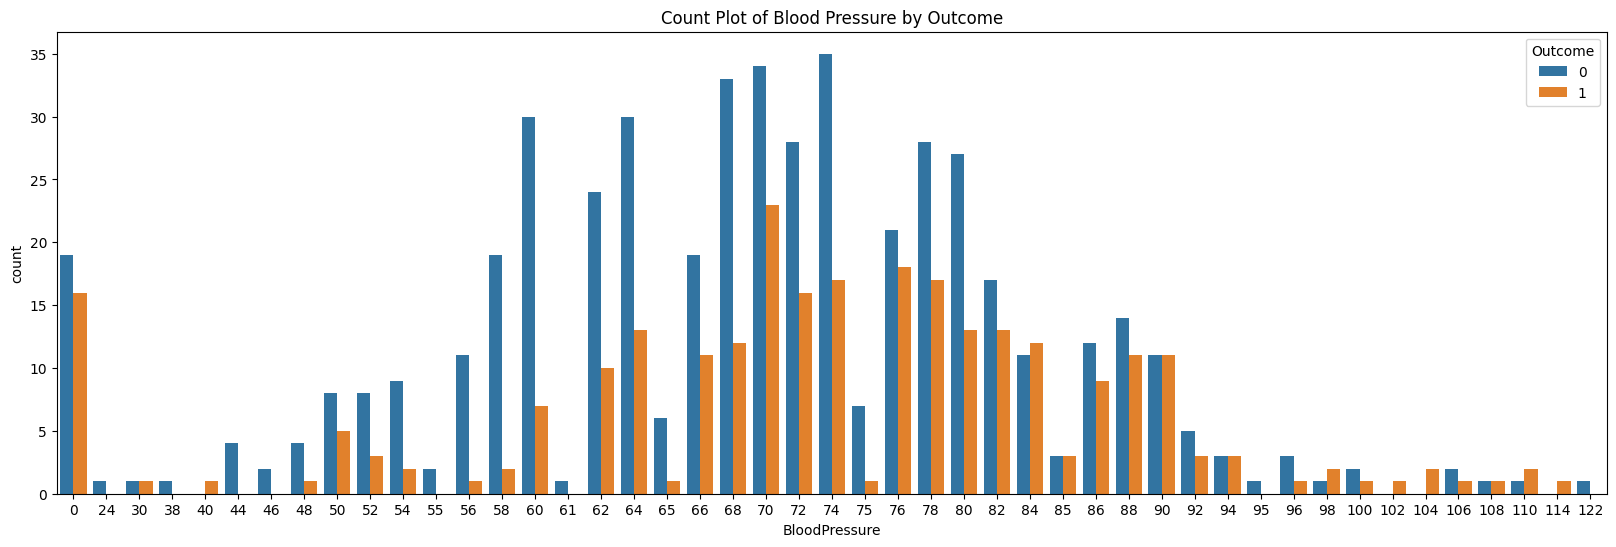

In [16]:
plt.figure(figsize=(20, 6))
sns.countplot(x=diab.BloodPressure ,hue = 'Outcome',data=diab)
plt.title("Count Plot for Outcome")
plt.title("Count Plot of Blood Pressure by Outcome")